In [ ]:
import numpy as np
from scipy.optimize import minimize


def f(w2, w3, w4,t):
    return np.exp(-w2 * t) * np.cos(w3 * t)+w4

def f_prime(w2, w3, w4,t):
    return  -w2*np.exp(-w2 * t) * np.cos(w3 * t) - w3*np.exp(-w2 * t)*np.sin(w3*t)

def f_double_prime(w2, w3, w4,t):
    return (w2**2)*np.exp(w2*t)*np.cos(w3*t)+2*w2*w3*np.exp(-w2*t)*np.sin(w3*t)-(w3**2)*np.exp(-w2*t)*np.cos(w3*t)


# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = -1/coefii
omega_0_v = 383.9911/coefii

K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    


t_data = np.linspace(0, 1, 50)
print(t_data)
del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    w2, w3, w4 = params
    
    u = f(w2, w3, w4,t_data)
    u_prime = f_prime(w2, w3, w4,t_data)
    u_double_prime = f_double_prime(w2, w3, w4,t_data)
    # print(u_prime)
    # print('===========')
    loss_i = np.sum((DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data))**2)

    eta = 5
    del0_pred = f(w2, w3, w4, 0)
    omega0_pred = f_prime(w2, w3, w4, 0) + ws

    print(del0_pred)
    print(del_0_v)

    loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b += eta * (omega_0_v - omega0_pred) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    # loss = loss_i+loss_b
    print(loss_b)
    raise Exception
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss




# initial_params = [1.5703050481447, 6.664583545312459, 8.490607793546264]
initial_params = [ 2.0000223654806906 , -59.203541383969124 , 3.9999979671138104 ]


# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

w2, w3, w4 = result.x


print("Optimized w2:", w2)
print("Optimized w3:", w3)
print("Optimized w4:", w4)
# print("Optimized d:", d)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
4.99999796711381
-0.1
8325.025009665227


Exception: 

[38.38268948 38.38442609 38.38596733 38.3873071  38.38843925 38.38935748
 38.39005542 38.39052659 38.3907644  38.39076216 38.39051309 38.39001029
 38.38924675 38.38821537 38.38690895 38.38532017 38.3834416  38.38126572
 38.37878488 38.37599136 38.37287729 38.36943472 38.36565557 38.36153169
 38.35705478 38.35221645 38.34700821 38.34142144 38.33544742 38.32907734
 38.32230226 38.31511314 38.30750082 38.29945606 38.29096948 38.2820316
 38.27263287 38.26276357 38.25241393 38.24157404 38.2302339  38.2183834
 38.20601234 38.19311038 38.17966713 38.16567205 38.15111453 38.13598385
 38.12026919 38.10395964]


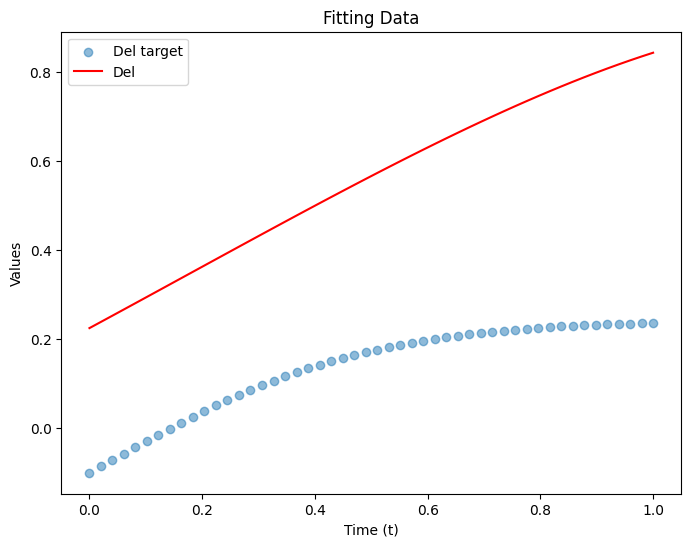

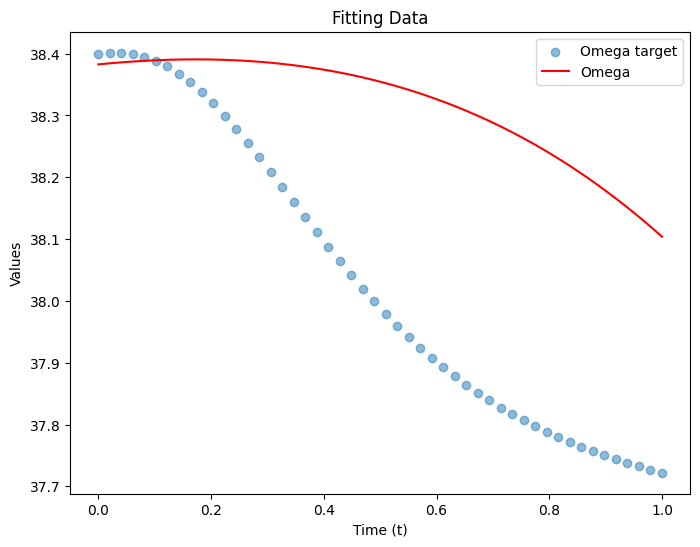

In [ ]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
fitted_values = f(w2, w3, w4,t_data)
plt.plot(t_data, fitted_values, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')


# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)
fitted_values = f_prime(w2, w3, w4,t_data)+ws
print(fitted_values)
plt.plot(t_data, fitted_values, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

plt.show()
